# Working with mats

In [2]:
(ns happy-tomato
  (:require
    [opencv4.utils :as u]
    [opencv4.core :refer :all]))

nil

You can create a mat using the constructor __new-mat__ from the core namespace. This works the same as its java equivalent, and takes width, height, and the number of channels as parameter to create it. 

The snippet below creates a 30x30 mat object, with 1 channel, just like you saw with Java.

In [3]:
(def mat (new-mat 30 30 CV_8UC1))
(u/>>> mat)


In [4]:
(set-to mat (new-scalar 105.0))
(u/>>> mat)

In [5]:
(def mat1 (new-mat 30 30 CV_8UC1))
(set-to mat1 (new-scalar 155.0))
(u/>>> mat1)

In [6]:
(->>
  (new-scalar 128.0)
  (new-mat 3 3 CV_8UC1)
  (dump))

[128 128 128]
[128 128 128]
[128 128 128]


nil

In [7]:
(u/>>> (hconcat! [mat mat1]))

In [8]:
(u/>>> (vconcat! [mat mat1]))

In [9]:
(def mat2 (new-mat 30 30 CV_8UC1 (new-scalar 0.0)))
(def sub (submat mat2 (new-rect 10.0 10.0 10.0 10.0)))
(set-to sub (new-scalar 255.0))
(u/>>> mat2)

In [10]:
(def red-mat (new-mat 30 30 CV_8UC3 (new-scalar 0 0 255)))
(u/>>> red-mat)

(def green-mat (new-mat 30 30 CV_8UC3 (new-scalar 0 255 0)))
(u/>>> green-mat)

(def blue-mat (new-mat 30 30 CV_8UC3 (new-scalar 255 0 0)))
(u/>>> blue-mat)

In [11]:
(def mat3 (new-mat 30 30 CV_8UC3 (new-scalar 255 255 0)))
(def sub (submat mat3 (new-rect 10 10 10 10)))
(set-to sub (new-scalar 0 255 255))
(u/>>> mat3)

(u/>>> (hconcat! (into [] (clojure.core/repeat 10 mat3))))

In [12]:
(->> mat3
    (clojure.core/repeat 10)
    (hconcat!)
    (u/>>>))

In [13]:
(def a (new-mat 3 3 CV_8UC3))

(.put a 0 0 (byte-array [0 238 238]))
(.put a 0 1 (byte-array [0 238 238]))
(.put a 0 2 (byte-array [0 238 238]))

(.put a 1 0 (byte-array [0 238 238]))
(.put a 1 1 (byte-array [0 238 238]))
(.put a 1 2 (byte-array [0 238 238]))

(.put a 2 0 (byte-array [0 238 238]))
(.put a 2 1 (byte-array [0 238 238]))
(.put a 2 2 (byte-array [0 238 238]))
(u/>>> a)

In [14]:
(dump a)

[0 238 238 0 238 238 0 238 238]
[0 238 238 0 238 238 0 238 238]
[0 238 238 0 238 238 0 238 238]


nil

In [15]:
(doseq [x [0 1 2]
        y [0 1 2]] 
  (prn (* x y)))
(range 10)

0
0
0
0
1
2
0
2
4


(0 1 2 3 4 5 6 7 8 9)

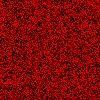

In [16]:
(def height 100)
(def width 100)

(def a (new-mat height width CV_8UC3))
(doseq [x (range width)
        y (range height)] 
  (.put a x y (byte-array [0 0 (rand 255)])))

(u/>>> a)

In [17]:
(u/>>>
  (hconcat!
     (into []
           (map
             #(-> (new-mat 30 30 CV_8UC1)
                  (set-to (new-scalar (double (* % 10)))) ) (range 1 25)))))

In [18]:

(u/>>>
  (hconcat!
     (into []
           (map
             #(-> (new-mat 30 30 CV_8UC3)
                  (set-to (new-scalar 0.0 (double (* % 10)) 0.0 )) ) (range 1 25)))))

In [19]:

(defn gradient [ gradient-fn ]
  (hconcat!
     (into []
           (map
             #(-> (new-mat 30 30 CV_8UC3)
                  (set-to (gradient-fn %) )) (range 1 25)))))

#'happy-tomato/gradient

In [20]:
(u/>>> (gradient #(new-scalar (double (* % 10)) 0.0 0.0)))

In [21]:
(u/>>> (gradient #(new-scalar 0.0 0.0 (double (* % 10)))))


In [22]:
(u/>>> (gradient #(new-scalar (double (* % 10)) (double (* % 10)) 0.0 )))

In [23]:
(require '[opencv4.colors.rgb :as rgb])


(defn scalar->bytes [s]
  (byte-array (take 3 (.val s ))))

(defn scalar-matrix-to-mat [matrix]
  (let [ row (count matrix) col (count (first matrix)) b (new-mat row col CV_8UC3)]
    (dotimes [i row]
    　(dotimes [j col ]
	 (.put b i j (scalar->bytes (nth (nth matrix i) j )))))
   b))

#'happy-tomato/scalar-matrix-to-mat

In [24]:

(u/>>>
  (scalar-matrix-to-mat 
     [
       
       [rgb/red-2 rgb/blue rgb/red-3 rgb/blue]
       [rgb/red-2 rgb/blue rgb/red-3 rgb/blue]
       [rgb/red-2 rgb/blue rgb/red-3 rgb/blue]
       [rgb/red-2 rgb/blue rgb/red-3 rgb/blue]
       [rgb/red-2 rgb/blue rgb/red-3 rgb/blue]
       [rgb/red-2 rgb/blue rgb/red-3 rgb/blue]
       [rgb/red-2 rgb/blue rgb/red-3 rgb/blue]
       [rgb/red-2 rgb/blue rgb/red-3 rgb/blue]
       
       ]))

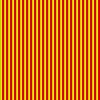

In [25]:
(u/>>>
  (scalar-matrix-to-mat 
    (clojure.core/repeat 100 
		(take 100 
          (clojure.core/cycle [rgb/yellow-3 rgb/yellow-2 rgb/red-2 rgb/red-3] )))))